# Lotka-Volterra Model in 2D with GeometricIntegrators.jl

Load GeometricIntegrators and Plots:

In [1]:
using GeometricIntegrators
using GeometricIntegrators.TestProblems.LotkaVolterra2dProblem
using GeometricIntegrators.TestProblems.LotkaVolterra2dProblem: hamiltonian

┌ Info: Precompiling GeometricIntegrators [dcce2d33-59f6-5b8d-9047-0defad88ae06]
└ @ Base loading.jl:1273


In [2]:
using Plots

Set number of integration steps $n_t$ and time step $\Delta t$:

In [3]:
const Δt = 0.01
const nt = 100000
;

### Integrate Lotka-Volterra example problem

Create implicit Gauss-Legendre Runge-Kutta ODE integrator:

In [4]:
int = IntegratorSLRK(lotka_volterra_2d_vdae_slrk(), getTableauSLRKLobIIID(2), Δt);

Integrate for $n_t$ time steps:

In [5]:
sol = integrate(int, nt);

Plot solution:

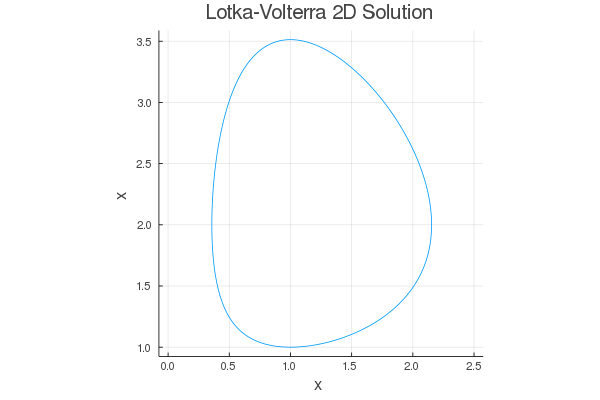

In [6]:
plot(sol.q.d[1,:], sol.q.d[2,:], legend=:none, xlab="x₁", ylab="x₂", title="Lotka-Volterra 2D Solution", xlim=[0,2.5], aspectratio=1, fmt=:png)

Compute and plot energy error:

In [7]:
    function compute_energy_error(t, q::DataSeries{T}) where {T}
        h = SDataSeries(T, q.nt)
        e = SDataSeries(T, q.nt)

        for i in axes(q,2)
            h[i] = hamiltonian(t[i], q[:,i])
            e[i] = (h[i] - h[0]) / h[0]
        end

        (h, e)
    end

compute_energy_error (generic function with 1 method)

In [8]:
H, ΔH = compute_energy_error(sol.t, sol.q);

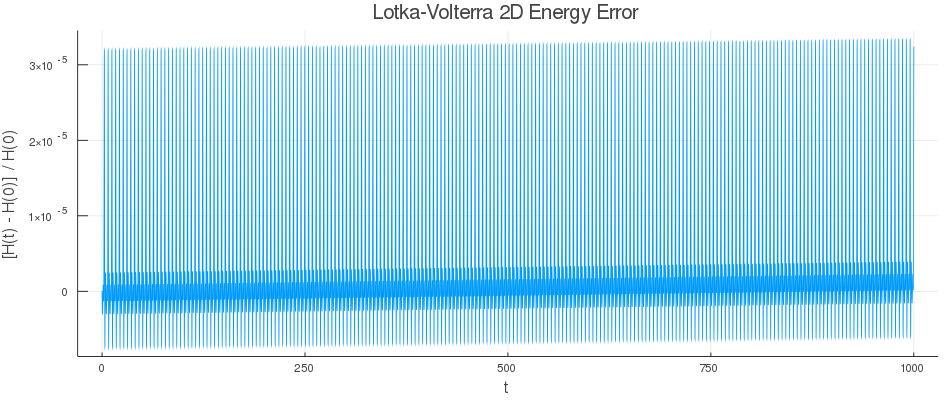

In [9]:
plot(sol.t.t, ΔH.d, legend=:none, xlab="t", ylab="[H(t) - H(0)] / H(0)", title="Lotka-Volterra 2D Energy Error", size=(950, 400), fmt=:png)